In [66]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

# Load example dataset

In [7]:
data_set = datasets.load_boston()
print(data_set.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Prepare data and target

In [12]:
data_frame = pd.DataFrame(data_set.data)
data_frame.columns = data_set.feature_names
data_frame['PRICE'] = data_set.target
data_frame.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [15]:
X = data_frame.drop('PRICE', axis=1)
Y = data_frame['PRICE']

## Create regression model

In [9]:
reg = linear_model.LinearRegression()

# Define train, test

### 1. Common split (1-fold)

In [60]:
random_seed = 1
X_train, X_test,y_train, y_test = train_test_split(X,Y,test_size=0.1,
                                                   shuffle=True,
                                                   random_state=random_seed)

In [61]:
reg.fit(X_train,y_train)
print('Y_predicted: ', reg.predict(X_test))
print('R2 score: ', reg.score(X_test,y_test))
print('Mean square error: ', mean_squared_error(y_test,reg.predict(X_test)))

Y_predicted:  [33.04785477 27.94755558 17.94404892 21.23007949 18.38639243 19.85798354
 32.51067614 18.05728098 24.76894794 27.19236393 27.05894522 28.67961485
 20.99869523 26.25235172 23.32788903 20.29182697 17.78543326 39.2352323
 29.88469502  8.39894175 20.55439258 15.54745482 25.2799218  25.02514543
 30.92984888 10.29052289 13.86888688 16.29300327 36.84734437 14.51958637
 20.4684512  13.51942531 43.49684586 18.06319021 21.54262781 20.82480875
 17.68911611 27.55526371  8.7590835  19.73132303 24.23351532 21.31236948
 29.69206642 16.41225643 19.34869984 14.70998095 39.69433382 18.05760645
 25.17471583 20.09718192 25.51195207]
R2 score:  0.7786386580298919
Mean square error:  20.544274659325755


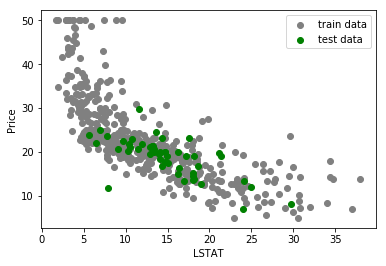

In [68]:
# Plot outputs using matplotlib
plt_train=plt.scatter(X_train['LSTAT'], y_train,  color='grey')
plt_test=plt.scatter(X_test['LSTAT'], y_test,  color='green')
plt.xlabel("LSTAT")
plt.ylabel("Price")
plt.legend((plt_train, plt_test),("train data", "test data"))
plt.show()

### 2. Use basic cross validation (k-fold)

In [63]:
kf = KFold(n_splits=10)
for train_i, test_i in kf.split(Y):
    X_train, X_test = X.iloc[train_i,:], X.iloc[test_i,:]
    y_train, y_test = Y.iloc[train_i], Y.iloc[test_i]
    
    reg.fit(X_train,y_train)   
    
print('Y_predicted: ', reg.predict(X_test))
print('R2 score: ', reg.score(X_test,y_test))
print('Mean square error: ', mean_squared_error(y_test,reg.predict(X_test)))

Y_predicted:  [12.61877731 12.80766548 17.3222476  18.76307482 19.22014949 20.44968245
 20.03452385 22.87081258 20.43190798 17.75643918 14.33852211 17.03030978
 16.99159213 18.56119351 20.35444574 23.32924524 22.6055202  25.72363254
 16.59087872 16.11548223 20.72379788 11.56073693 19.44044689 22.16495312
 23.64646213 27.46632887 28.98710921 21.04362395 19.32198066 22.29857058
 19.86251972 21.3543872  10.87258314  7.08593616  2.33607188 12.83899018
 15.01627195 20.33504447 20.1622401  16.18933129 13.64581384 18.93877025
 21.09426608 18.26151226 20.36806946 23.65972148 22.58655452 28.08596609
 26.54976756 22.63987499]
R2 score:  0.4189434986442731
Mean square error:  10.960410679422942


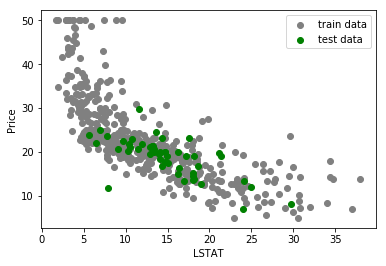

In [67]:
# Plot outputs using matplotlib
plt_train=plt.scatter(X_train['LSTAT'], y_train,  color='grey')
plt_test=plt.scatter(X_test['LSTAT'], y_test,  color='green')
plt.xlabel("LSTAT")
plt.ylabel("Price")
plt.legend((plt_train, plt_test),("train data", "test data"))
plt.show()